In [2]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [3]:
###Import af data

dfklip = pd.read_csv('uge40klippelog.csv')

dfpogo = pd.read_csv('uge40moist.csv')

dfstimp = pd.read_csv('uge40stimp.csv')

dfevents =pd.read_csv('uge40events.csv')

print("Clipdata:")
print (dfklip.describe())

print("\nPogo:")
print (dfpogo.describe())

print("\nStimp:")
print(dfstimp.describe())

Clipdata:
               Hul
count  5140.000000
mean     10.500000
std       5.766842
min       1.000000
25%       5.750000
50%      10.500000
75%      15.250000
max      20.000000

Pogo:
          Dataset  Moisture (Avg) (%)  Moisture (Min) (%)  Moisture (Max) (%)
count  476.000000          476.000000          476.000000          476.000000
mean     1.002101           25.402521           18.701681           33.657563
std      0.045835            3.409731            4.143133            4.331326
min      1.000000           16.100000            0.000000           21.000000
25%      1.000000           22.900000           16.000000           31.000000
50%      1.000000           25.450000           18.500000           34.000000
75%      1.000000           27.800000           22.000000           37.000000
max      2.000000           34.600000           33.000000           46.000000

Stimp:
         Stimp CM  Bobble  Chatter  Snaking  Trueness
count  550.000000     0.0      0.0      0.0     

In [4]:
dfklip.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,Rulle,Led,Unnamed: 12
0,16/04/2023,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,16/04/2023,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2,16/04/2023,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,16/04/2023,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
4,16/04/2023,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN


In [5]:
###Datacleaning - Drop values + cols 



dfstimp = dfstimp[dfstimp.columns[:dfstimp.columns.get_loc('Stimp F') + 1]]
dfstimp = dfstimp.dropna(subset=['Dato'])


print(dfstimp.head())

         Dato     Hul  Stimp CM Stimp F
0  10/05/2024  Hul 15     249.0   8,169
1  10/05/2024  Hul 15     246.0   8,071
2  10/05/2024  Hul 15     248.0   8,136
3  10/05/2024  Hul 15     273.0   8,957
4  10/05/2024  Hul 15     280.0   9,186


In [6]:
### Datacleaning værdiger
dfklip['Liter'] = dfklip['Liter'].astype(str).str.replace(',','.')

dfstimp = dfstimp.rename(columns={'Stimp F': 'Stimp_F'})
dfstimp = dfstimp.rename(columns={'Stimp CM': 'Stimp_CM'})
dfstimp['Stimp_F'] = dfstimp['Stimp_F'].astype(str).str.replace(',','.').astype(float)

dfpogo[['Dato','Time']] = dfpogo['Sample Date'].str.split(' ', n=1,expand=True)
dfpogo = dfpogo.drop(columns=['Sample Date'])


In [7]:
def categorize_stimp(stimp):
    if pd.isna(stimp):
        return None
    elif stimp < 9:
        return 'Low'
    elif 10 <= stimp <= 10.5:
        return 'Target range'
    else:
        return 'High'
    
dfstimp['Stimp_range'] = dfstimp['Stimp_F'].apply(categorize_stimp)


In [8]:
###Datacleaning Dato til pd.datetime
from datetime import datetime, timedelta

dfklip['Dato'] = pd.to_datetime(dfklip['Dato'], format='%d/%m/%Y', dayfirst=True)
dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'], format='%d/%m/%Y', dayfirst=True)
dfpogo['Dato'] = pd.to_datetime(dfpogo['Dato'], format='%Y-%m-%d')
dfevents['Dato'] = pd.to_datetime(dfevents['Dato'], format='%d/%m/%Y', dayfirst=True)

dfklip['Week'] = dfklip['Dato'].dt.isocalendar().week
dfstimp['Week'] = dfstimp['Dato'].dt.isocalendar().week
dfpogo['Week'] = dfpogo['Dato'].dt.isocalendar().week
dfevents['Week'] = dfevents['Dato'].dt.isocalendar().week

dfklip['Month'] = dfklip['Dato'].dt.month
dfstimp['Month'] = dfstimp['Dato'].dt.month
dfpogo['Month'] = dfpogo['Dato'].dt.month
dfevents['Month'] = dfevents['Dato'].dt.month

dfklip['Year'] = dfklip['Dato'].dt.year
dfstimp['Year'] = dfstimp['Dato'].dt.year
dfpogo['Year']  = dfpogo['Dato'].dt.year
dfevents['Year'] = dfevents['Dato'].dt.year

print("Cleaned dfklip:")
print(dfklip.head())
print("\nCleaned dfstimp:")
print(dfstimp.head())
print("\nCleaned dfpogo:")
print(dfpogo.head())

Cleaned dfklip:
        Dato Retning  Hul Liter Maskine Højde Bemærkning Person Cleanup Brush  \
0 2023-04-16     NaN    1     4     NaN   NaN        NaN    NaN      No   NaN   
1 2023-04-16     NaN    2     6     NaN   NaN        NaN    NaN      No   NaN   
2 2023-04-16     NaN    3     5     NaN   NaN        NaN    NaN      No   NaN   
3 2023-04-16     NaN    4     8     NaN   NaN        NaN    NaN      No   NaN   
4 2023-04-16     NaN    5     4     NaN   NaN        NaN    NaN      No   NaN   

  Rulle  Led Unnamed: 12  Week  Month    Year  
0   NaN  NaN         NaN    15    4.0  2023.0  
1   NaN  NaN         NaN    15    4.0  2023.0  
2   NaN  NaN         NaN    15    4.0  2023.0  
3   NaN  NaN         NaN    15    4.0  2023.0  
4   NaN  NaN         NaN    15    4.0  2023.0  

Cleaned dfstimp:
        Dato     Hul  Stimp_CM  Stimp_F Stimp_range  Week  Month  Year
0 2024-05-10  Hul 15     249.0    8.169         Low    19      5  2024
1 2024-05-10  Hul 15     246.0    8.071         L

<function matplotlib.pyplot.show(close=None, block=None)>

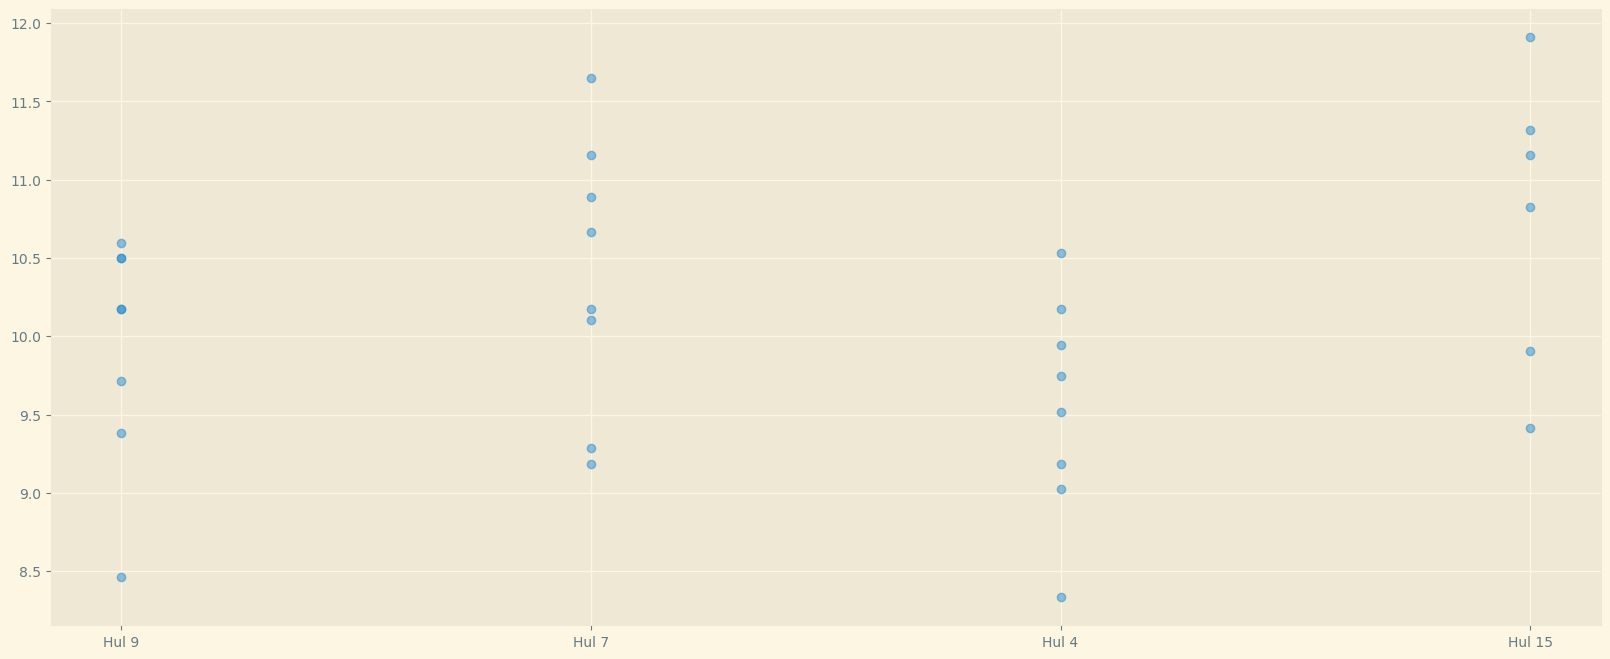

In [9]:
uge_29_stimp = dfstimp[dfstimp['Week'] == 29]

plt.figure(figsize=(20,8))
plt.scatter(uge_29_stimp['Hul'],uge_29_stimp['Stimp_F'],alpha=0.5)
plt.show



Average ml/m2 per Green:
    Hul  ml_per_m2
0     1  17.366062
1     2  16.597510
2     3  16.411998
3     4  20.084830
4     5  16.778523
5     6  18.266667
6     7  17.236467
7     8  18.058691
8     9  16.140351
9    10  20.274914
10   11  17.254902
11   12  19.503546
12   13  18.575324
13   14  18.654434
14   15  15.911172
15   16  21.146617
16   17  20.998677
17   18  16.588603
18   19  10.063320
19   20   8.515815


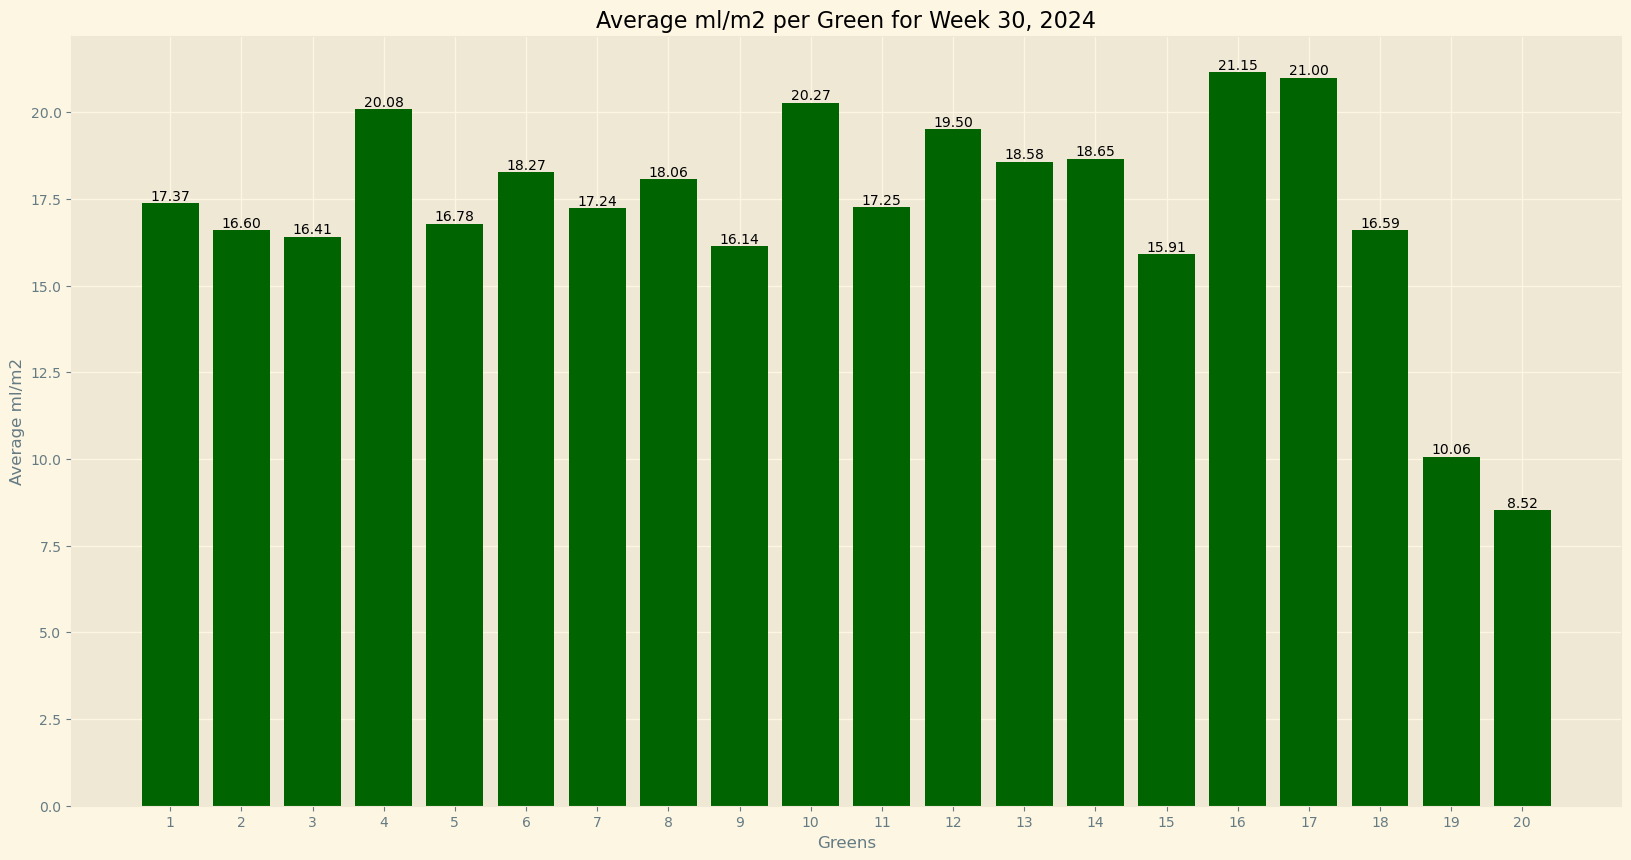

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

###ÆNDRE HER FOR ANDEN UGE 
mlm2_uge = dfklip[(dfklip['Week'] == 30) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string for matching green sizes
mlm2_uge['Hul'] = mlm2_uge['Hul'].astype(str)

# Calculate ml/m²
mlm2_uge['Green Size'] = mlm2_uge['Hul'].map(green_sizes)
mlm2_uge['Liter'] = mlm2_uge['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_uge['ml_per_m2'] = (mlm2_uge['Liter'] * 1000) / mlm2_uge['Green Size']

# Group by 'Hul' to calculate the average ml_per_m2 per green
average_ml_per_m2 = mlm2_uge.groupby('Hul')['ml_per_m2'].mean().reset_index()

# Ensure all 'Hul' values from 1 to 20 are included
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(20, 10))
bars = plt.bar(average_ml_per_m2['Hul'], average_ml_per_m2['ml_per_m2'], color='darkgreen')
plt.xlabel('Greens')
plt.ylabel('Average ml/m2')
plt.title('Average ml/m2 per Green for Week 30, 2024')
plt.xticks(ticks=average_ml_per_m2['Hul'], labels=average_ml_per_m2['Hul'])

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [11]:
import matplotlib.dates as mdates
# Filter the data for the specific week and year
weeks = [29,30]
line_month = dfklip[(dfklip['Year'] == year) & (dfklip['Dato'].dt.month == month)]

line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)




# Group the data by 'dato' and sum the 'Liter' column
line_liter = line_month.groupby('Dato')['Liter'].sum()
total_week_liters =line_liter.sum()
# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
line_liter.plot(kind='line', marker='o',color='darkgreen')
plt.title('Total liters per day week 29 - 30 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())


# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

plt.legend([f'Total liter sum:{total_week_liters:.2f}'], loc='upper right')

plt.show()



NameError: name 'year' is not defined

Average ml/m2 per Green:
    Hul          8          9
0     1  18.682227  17.548863
1     2  18.706777  16.301126
2     3  18.704018  17.624707
3     4  22.330339  25.377816
4     5  17.673378  15.659955
5     6  21.040000  24.200000
6     7  18.746439  21.965812
7     8  18.246802  18.905192
8     9  17.228070  15.736842
9    10  20.034364  21.752577
10   11  17.725490  18.176471
11   12  19.706180  21.808511
12   13  17.552829  17.024540
13   14  18.379205  17.844037
14   15  16.094322  18.543956
15   16  20.739348  21.710526
16   17  19.642857  20.287698
17   18  16.315379  12.997658
18   19  11.784512  10.640577
19   20   8.248175   7.299270


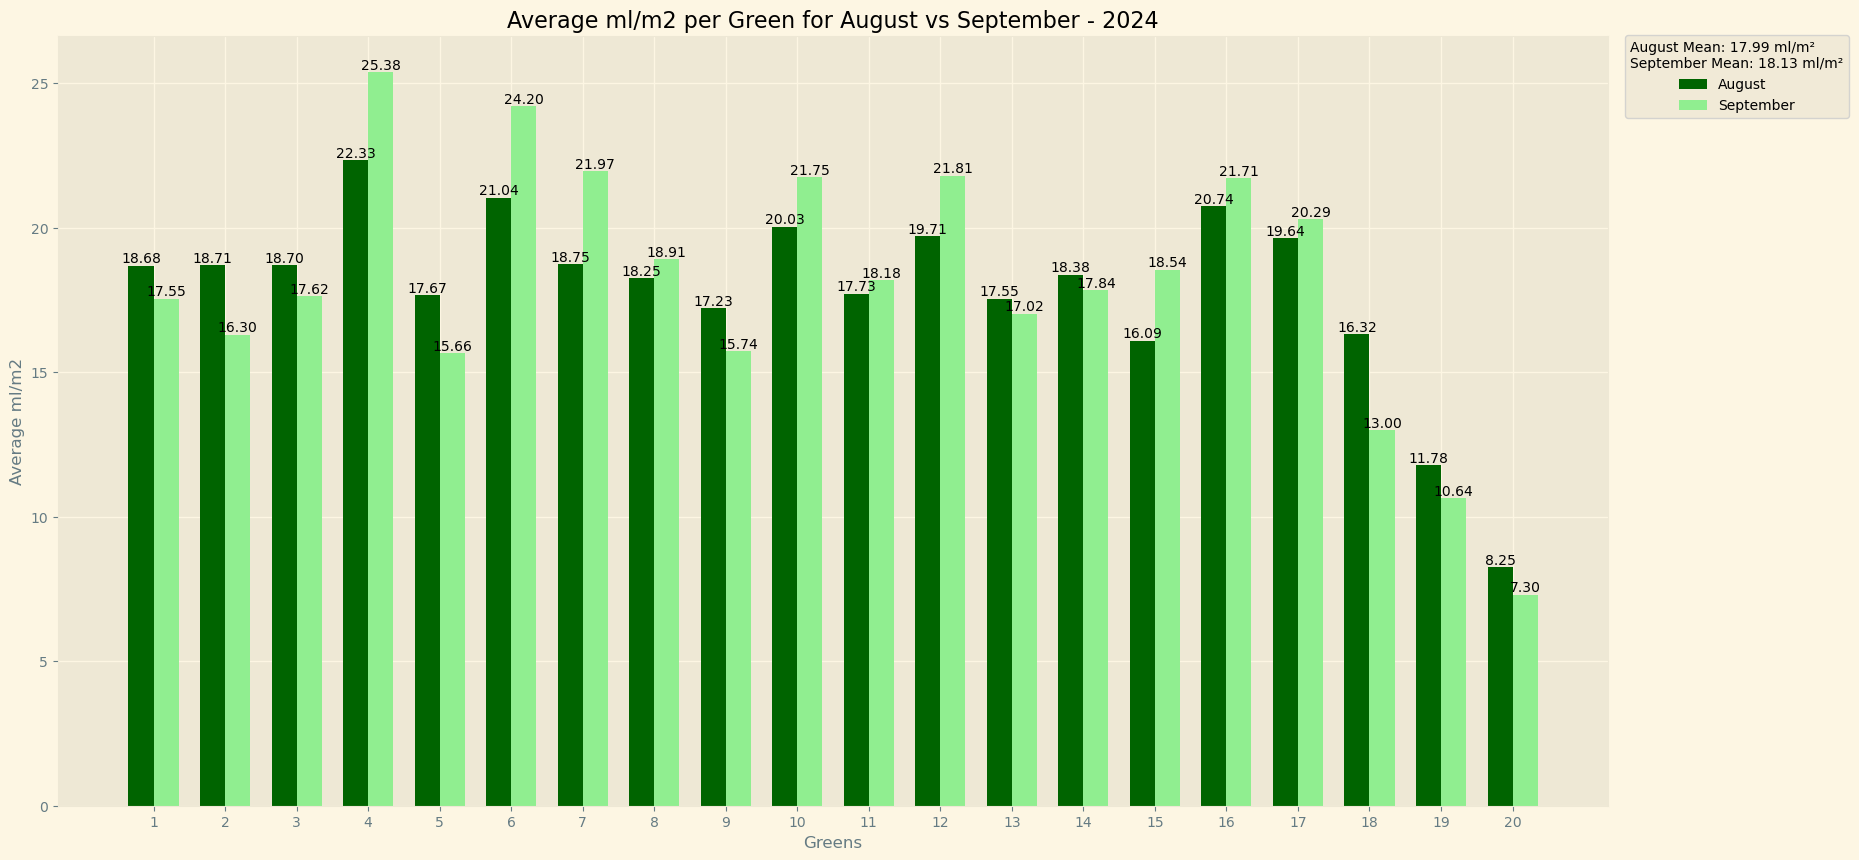

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

# Filter data for two months
month1 = 8  # Example for July
month2 = 9  # Example for August
year = 2024

# Filter data by month and year
mlm2_months = dfklip[(dfklip['Month'].isin([month1, month2])) & (dfklip['Year'] == year)]

# Ensure 'Hul' is string for matching green sizes
mlm2_months['Hul'] = mlm2_months['Hul'].astype(str)

# Calculate ml/m²
mlm2_months['Green Size'] = mlm2_months['Hul'].map(green_sizes)
mlm2_months['Liter'] = mlm2_months['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_months['ml_per_m2'] = (mlm2_months['Liter'] * 1000) / mlm2_months['Green Size']

# Add a 'Month' column to group by month
mlm2_months['Month'] = mlm2_months['Dato'].dt.month

# Group by 'Hul' and 'Month' to calculate the average ml_per_m2 per green per month
average_ml_per_m2 = mlm2_months.groupby(['Hul', 'Month'])['ml_per_m2'].mean().reset_index()

# Calculate the overall mean ml/m² for each month
mean_ml_per_m2_month1 = mlm2_months[mlm2_months['Month'] == month1]['ml_per_m2'].mean()
mean_ml_per_m2_month2 = mlm2_months[mlm2_months['Month'] == month2]['ml_per_m2'].mean()

# Ensure all 'Hul' values from 1 to 20 are included for each month
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = average_ml_per_m2.pivot(index='Hul', columns='Month', values='ml_per_m2').reset_index()
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with two bars per 'Hul' for each month
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.35
index = average_ml_per_m2['Hul']

bar1 = ax.bar(index - bar_width/2, average_ml_per_m2[month1], bar_width, label=f'August', color='darkgreen')
bar2 = ax.bar(index + bar_width/2, average_ml_per_m2[month2], bar_width, label=f'September', color='lightgreen')

ax.set_xlabel('Greens')
ax.set_ylabel('Average ml/m2')
ax.set_title(f'Average ml/m2 per Green for August vs September - {year}')
ax.set_xticks(index)
ax.set_xticklabels(average_ml_per_m2['Hul'])

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Update legend with mean values
legend_title = (f'August Mean: {mean_ml_per_m2_month1:.2f} ml/m²\n'
                f'September Mean: {mean_ml_per_m2_month2:.2f} ml/m²')
ax.legend(title=legend_title, loc='upper right', bbox_to_anchor=(1.16, 1.01))

# Show the plot
plt.show()


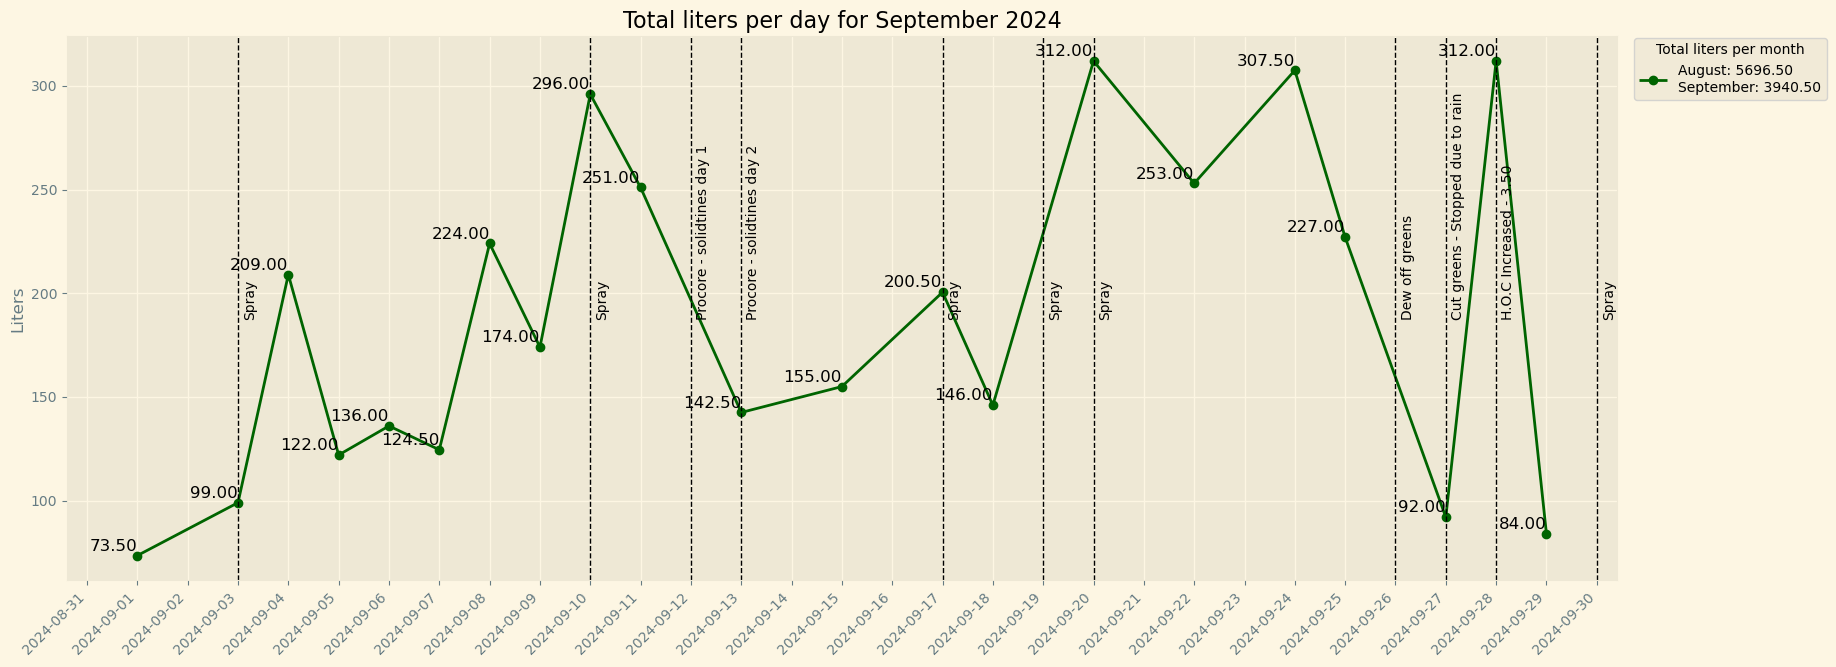

In [27]:
# Filter data for September and October 2024
# Filter data for August and September 2024
months = [8, 9]
line_month = dfklip[(dfklip['Month'].isin(months)) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string and 'Liter' is properly formatted
line_month['Hul'] = line_month['Hul'].astype(str)
line_month['Liter'] = line_month['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_month.groupby('Dato')['Liter'].sum()

# Calculate total liters for each month separately
total_august_liters = line_month[line_month['Month'] == 8]['Liter'].sum()
total_september_liters = line_month[line_month['Month'] == 9]['Liter'].sum()

# Filter events for August and September, excluding "Cut greens" and "Roll greens"
filtered_events = dfevents[(dfevents['Month'].isin(months)) & 
                           (dfevents['Year'] == 2024) & 
                           (~dfevents['Event'].isin(['Cut greens', 'Roll greens']))]

# Filter the line graph to only show September (or you can change to August if needed)
line_liter_september = line_liter[line_liter.index.month == 9]

# Plot the line graph for September only
plt.figure(figsize=(20, 8))
line_liter_september.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day for September 2024')
plt.xlabel('')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter_september.index, line_liter_september.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add vertical lines for filtered green events in September only
filtered_events_september = filtered_events[filtered_events['Dato'].dt.month == 9]
for index, row in filtered_events_september.iterrows():
    plt.axvline(x=row['Dato'], color='black', linestyle='--', linewidth=1)
    plt.text(row['Dato'] + pd.Timedelta(days=0.1), line_liter_september.max() * 0.6, row['Event'], 
             rotation=90, verticalalignment='bottom')

# Update the legend to show totals for August and September
plt.legend([f'August: {total_august_liters:.2f}\nSeptember: {total_september_liters:.2f}'], 
           loc='upper right', title='Total liters per month', bbox_to_anchor=(1.14, 1.01))

plt.show()


Month  Hul          8          9
0        4  10.109852   9.534875
1        7  10.851074  10.789875
2        9  10.788207  10.319281
3       12   9.219000   0.000000
4       13  11.027423  10.944333
5       15  11.638714  11.642059
6       17  11.172538  10.910273

Stimp_avg_8 10.921371951219513
Stimp_avg_9 10.693941489361702


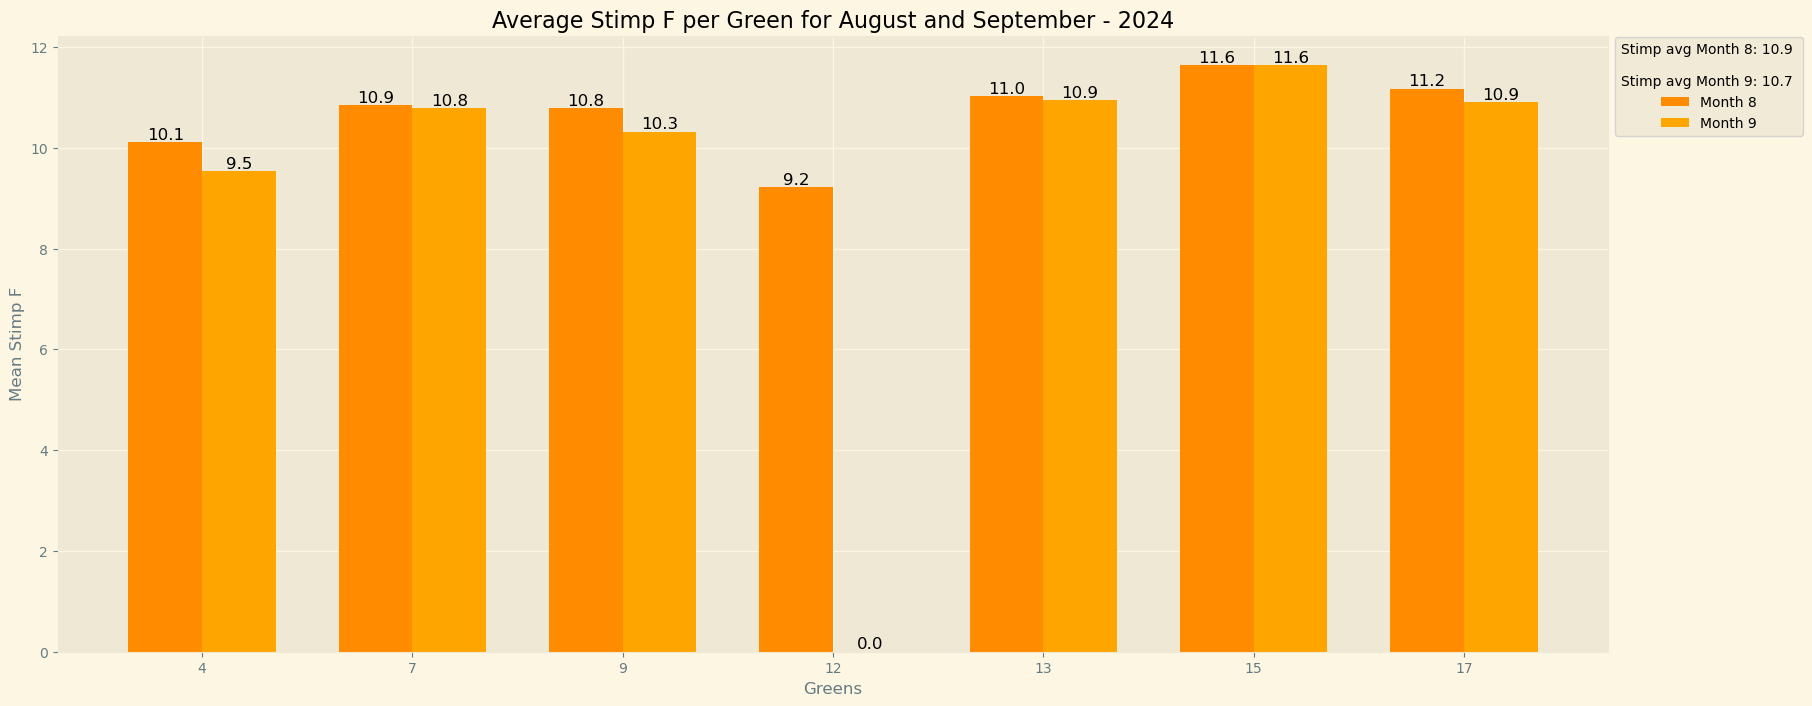

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Hul' is string and then extract numeric parts
dfstimp['Hul'] = dfstimp['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the months and year for comparison
month1 = 8  # Example for July
month2 = 9  # Example for August
year = 2024

# Filter the data for the selected months and year
stimp_months = dfstimp[(dfstimp['Month'].isin([month1, month2])) & (dfstimp['Year'] == year)]

# Group by 'Hul' and 'Month' to calculate the mean Stimp F per green per month
mean_stimp = stimp_months.groupby(['Hul', 'Month'])['Stimp_F'].mean().reset_index()

# Pivot the data to have months as columns
mean_stimp_pivot = mean_stimp.pivot(index='Hul', columns='Month', values='Stimp_F').reset_index().fillna(0)

# Calculate the overall average Stimp F for each month
stimp_avg_month1 = stimp_months[stimp_months['Month'] == month1]['Stimp_F'].mean()
stimp_avg_month2 = stimp_months[stimp_months['Month'] == month2]['Stimp_F'].mean()

# Print the result to ensure it is correct
print(mean_stimp_pivot)
print(f"\nStimp_avg_{month1}", stimp_avg_month1)
print(f"Stimp_avg_{month2}", stimp_avg_month2)

# Plot the bar chart with two bars per 'Hul' for each month
fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.35
index = range(len(mean_stimp_pivot))

bar1 = ax.bar([i - bar_width/2 for i in index], mean_stimp_pivot[month1], bar_width, label=f'Month {month1}', color='darkorange')
bar2 = ax.bar([i + bar_width/2 for i in index], mean_stimp_pivot[month2], bar_width, label=f'Month {month2}', color='orange')

ax.set_xlabel('Greens')
ax.set_ylabel('Mean Stimp F')
ax.set_title(f'Average Stimp F per Green for August and September - {year}')
ax.set_xticks(index)
ax.set_xticklabels(mean_stimp_pivot['Hul'])
ax.legend(title=f'Stimp avg Month {month1}: {stimp_avg_month1:.1f} \n\nStimp avg Month {month2}: {stimp_avg_month2:.1f}', loc='upper right', bbox_to_anchor=(1.13, 1.01))

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.show()


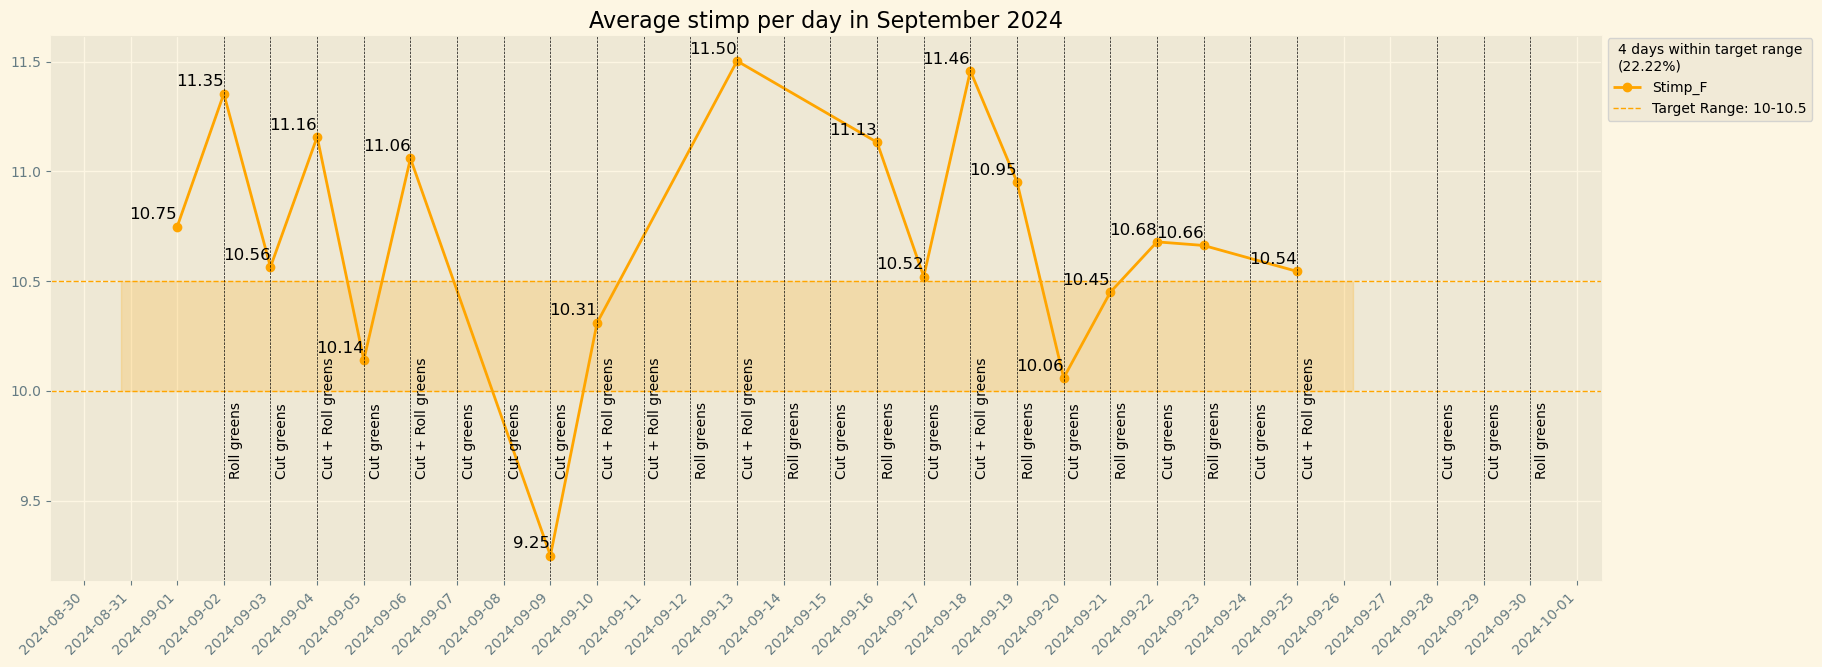

In [19]:
# Filter the stimp data for September 2024
filtered_stimp_df = dfstimp[(dfstimp['Month'] == 9) & (dfstimp['Year'] == 2024)]

# Group by 'Dato' and calculate the mean of 'Stimp_F' for the selected month
mean_stimp_f = filtered_stimp_df.groupby('Dato')['Stimp_F'].mean()

# Filter the green events to include only September 2024
filtered_green_events = dfevents[
    (dfevents['Dato'].dt.month == 9) & 
    (dfevents['Dato'].dt.year == 2024) & 
    dfevents['Event'].isin(['Roll greens', 'Cut greens'])
].drop_duplicates()

# Recreate the combined event description for dates where both events occurred
combined_event_description = {}
for date, group in filtered_green_events.groupby('Dato'):
    events = group['Event'].unique()
    if len(events) > 1:
        combined_event_description[date] = 'Cut + Roll greens'
    else:
        combined_event_description[date] = events[0]

# Define the target range
target_min = 10
target_max = 10.5

# Recalculate the count and percentage within the target range
in_target_range = mean_stimp_f[(mean_stimp_f >= target_min) & (mean_stimp_f <= target_max)].count()
total_days = mean_stimp_f.count()
percentage_in_target_range = (in_target_range / total_days) * 100

# Plot the line graph for mean stimp f per day in the selected month
plt.figure(figsize=(20, 8))
mean_stimp_f.plot(kind='line', marker='o', color='orange')
plt.title('Average stimp per day in September 2024')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Add horizontal lines for the target range
plt.axhline(y=target_min, color='orange', linestyle='--', linewidth=1, label=f'Target Range: {target_min}-{target_max}')
plt.axhline(y=target_max, color='orange', linestyle='--', linewidth=1)

# Shade the area between the target range
plt.fill_between(ax.get_xlim(), target_min, target_max, color='orange', alpha=0.2)

# Add vertical lines for the dates where events occurred and annotate the events
for date, description in combined_event_description.items():
    plt.axvline(x=date, color='black', linestyle='--', linewidth=0.5)
    # Add a small offset to move the text further from the line
    plt.text(date + pd.Timedelta(days=0.101), target_max - 0.9, description, rotation=90, verticalalignment='bottom')

# Annotate each data point with its value
for x, y in zip(mean_stimp_f.index, mean_stimp_f.values):
    plt.text(x, y + 0.02, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add the count and percentage to the legend
legend_text = (f'{in_target_range} days within target range\n'
               f'({percentage_in_target_range:.2f}%)')
ax.legend(title=legend_text, loc='upper left', bbox_to_anchor=(1, 1.01))

# Show the plot
plt.show()

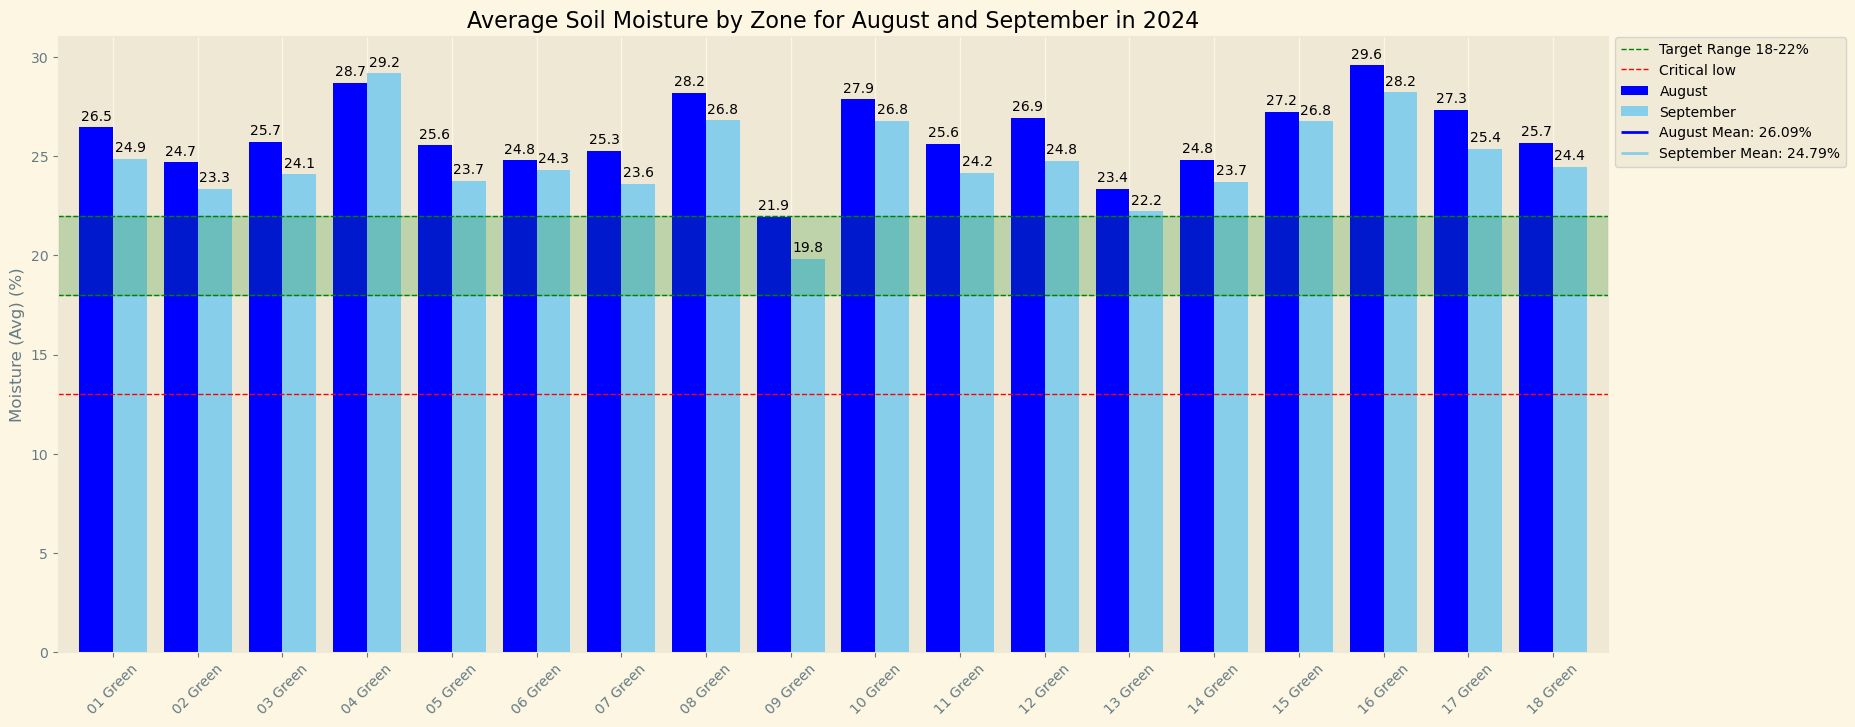

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the months and year for comparison
month1 = 8  # July
month2 = 9  # August
year = 2024

# Filter data by month and year
df_filtered = dfpogo[(dfpogo['Month'].isin([month1, month2])) & (dfpogo['Year'] == year)]

# Extract just the date part from 'Sample Date'
df_filtered['Dato'] = df_filtered['Dato'].dt.date

# Group by 'Zone' and 'Month' to calculate mean soil moisture
grouped_df = df_filtered.groupby(['Zone', 'Month'])['Moisture (Avg) (%)'].mean().unstack()

# Rename the columns to 'July' and 'August'
grouped_df.columns = ['August', 'September']

# Calculate the mean for July and August
mean_july = grouped_df['August'].mean().round(2)
mean_august = grouped_df['September'].mean().round(2)

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['Blue', 'skyblue'])
plt.title(f'Average Soil Moisture by Zone for August and September in {year}')
plt.xlabel('')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1)

# Adding a red dotted line at 13%
plt.axhline(y=13, color='red', linestyle='--', linewidth=1, label='Critical low')

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with monthly means and the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='blue', label=f'August Mean: {mean_july:.2f}%'))
handles.append(plt.Line2D([], [], color='skyblue', label=f'September Mean: {mean_august:.2f}%'))
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()



In [22]:


# Standardizing the 'Hul' column to string
dfklip['Hul'] = dfklip['Hul'].astype(str)
dfstimp['Hul'] = dfstimp['Hul'].astype(str)

# Ensuring 'Dato' is in datetime format
dfklip['Dato'] = pd.to_datetime(dfklip['Dato'])
dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'])

# Merging based on 'Dato' and 'Hul'
merged_df = pd.merge(dfklip, dfstimp, on=['Dato', 'Hul'], how='left')
merged_df.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,...,Unnamed: 12,Week_x,Month_x,Year_x,Stimp_CM,Stimp_F,Stimp_range,Week_y,Month_y,Year_y
0,2023-04-16,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
1,2023-04-16,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
2,2023-04-16,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
3,2023-04-16,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN
4,2023-04-16,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN,...,NaN,15,4.0,2023.0,NaN,NaN,NaN,<NA>,NaN,NaN


In [14]:
# Filter data for weeks 36 and 37 of 2024
week_start = 36
week_end = 37
year = 2024

# Filter the data for the weeks
klippelog_filtered = dfklip[(dfklip['Dato'].dt.isocalendar().week >= week_start) & 
                                  (dfklip['Dato'].dt.isocalendar().week <= week_end) &
                                  (dfklip['Dato'].dt.year == year)]

# Ensure 'Liter' is a valid float type
klippelog_filtered['Liter'] = klippelog_filtered['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group by 'Dato' and sum 'Liter' column
line_liter = klippelog_filtered.groupby('Dato')['Liter'].sum()

# Calculate total liters for the time period (weeks 36 and 37)
total_week_liters = klippelog_filtered['Liter'].sum()

# Filter out 'Cut greens' and 'Roll greens' from the green events
green_events_filtered = green_events_df[~green_events_df['Event'].isin(['Cut greens', 'Roll greens'])]

# Get dates and events with remarks (non-null events)
event_dates = green_events_filtered[['Dato', 'Event']].drop_duplicates()

# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day - Weeks 36 and 37, 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add vertical lines for dates with events and build the legend text
legend_text = [f'Total liters for period: {total_week_liters:.2f}']
for index, row in event_dates.iterrows():
    plt.axvline(x=row['Dato'], color='black', linestyle='--', linewidth=1)
    legend_text.append(f"{row['Dato'].strftime('%Y-%m-%d')}: {row['Event']}")

# Update the legend to show total for the period and events
ax.legend(legend_text, loc='upper right', title='Total liters and Events', bbox_to_anchor=(1.16, 1.01))

# Show the plot
plt.show()

NameError: name 'green_events_df' is not defined